<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# load dependencies
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from matplotlib import pyplot as plt

In [2]:
# load data
mnist_train = datasets.MNIST(root='data', train = True, download = True, transform = transforms.ToTensor())
mnist_test = datasets.MNIST(root='data', train = False, download = True, transform = transforms.ToTensor())
dataset = DataLoader(mnist_train, 32, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 88715858.57it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 113105222.99it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 34033391.22it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20707096.49it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



60000
10000
torch.Size([1, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

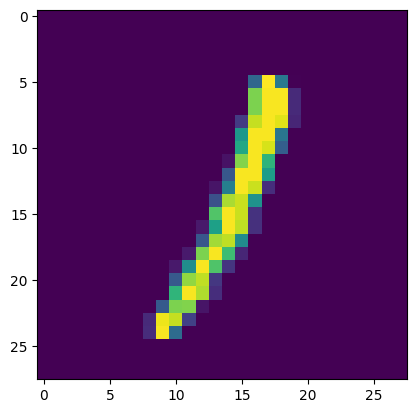

In [3]:
print(len(mnist_train))
print(len(mnist_test))
img, label = mnist_train[99]
print(img.shape)

label
plt.imshow(img.permute(1, 2, 0))
plt.show

In [4]:
class ImageClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, 32, (3,3)),
        nn.ReLU(),
        nn.Conv2d(32, 64, (3,3)),
        nn.ReLU(),
        nn.Conv2d(64, 64, (3,3)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(64*(28-6)*(28-6),10),
        nn.Softmax()
    )

  def forward(self, x):
    return self.model(x)

In [5]:
# create an instiance of your image classifier, loss, and optimizer
clf = ImageClassifier().to('cuda')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [15]:
# training
if __name__ == '__main__':
  for epoch in range(10):
    for batch in dataset:
      x, y = batch
      x, y = x.to('cuda'), y.to('cuda')
      ypred = clf(x)
      loss = loss_fn(ypred, y)

      # apply backprop
      opt.zero_grad()
      loss.backward()
      opt.step()

    print(f'Epoch:{epoch} loss: {loss.item()} ')

Epoch:0 loss: 1.6174007654190063 
Epoch:1 loss: 1.586150884628296 
Epoch:2 loss: 1.4924007654190063 
Epoch:3 loss: 1.5236507654190063 
Epoch:4 loss: 1.4924007654190063 
Epoch:5 loss: 1.4924007654190063 
Epoch:6 loss: 1.523650884628296 
Epoch:7 loss: 1.4611507654190063 
Epoch:8 loss: 1.4611507654190063 
Epoch:9 loss: 1.5549007654190063 


60000
Label:  7
Prediction:  tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
Prediction:  tensor(7, device='cuda:0')


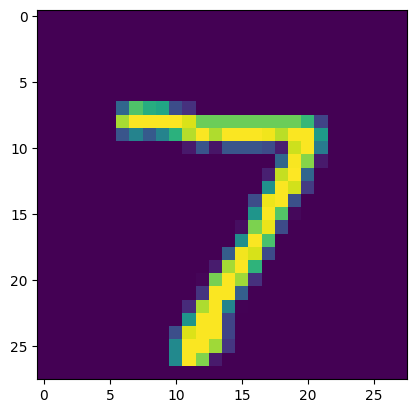

In [7]:
# test our clf
print(len(mnist_train))
len(dataset)  # 32 * 1875 = 60000

img, label = mnist_test[0]
print('Label: ', label)
plt.imshow(img.permute(1, 2, 0))
plt.show

# transform the image into the right shape
img = img.unsqueeze(0).to('cuda')
print('Prediction: ', clf(img))
print('Prediction: ', torch.argmax(clf(img)))


In [23]:
# test the model accuracy against the test set

test_set = DataLoader(mnist_test, batch_size = 32, shuffle = False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in test_set:
    imgs, labels = imgs.to('cuda'), labels.to('cuda')
    predicted = torch.argmax(clf(imgs), dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print(f"Accuracy: {correct / total * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Accuracy: 97.50%
